In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
from matplotlib import ticker as mpl_ticker
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-09-07T01:26:59.732865+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1031-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

matplotlib: 3.9.2
teeplot   : 1.2.0
seaborn   : 0.13.2
pandas    : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "wse-traits"
teeplot_subdir


'wse-traits'

## Prep Data


In [5]:
dfxs_list = []

for data in tqdm([
    {
        "url": "https://osf.io/x6uvs/download",
        "initial conditions": "50/50",
        "genome model": "site-explicit",
    },
    {
        "url": "https://osf.io/bhk27/download",
        "initial conditions": "50/50",
        "genome model": "counter-based",
    },
    {
        "url": "https://osf.io/4mdws/download",
        "initial conditions": "de novo",
        "genome model": "site-explicit",
    },
    {
        "url": "https://osf.io/eacvu/download",
        "initial conditions": "de novo",
        "genome model": "counter-based",
    },
]):
    dfx = pd.read_parquet(data["url"])
    dfx["initial conditions"] = data["initial conditions"]
    dfx["genome model"] = data["genome model"]
    print("apn", dfx["population size"].min())
    print(dfx["population size"].unique())
    dfxs_list.append(dfx)


 25%|██▌       | 1/4 [00:01<00:04,  1.41s/it]

apn 256
[      256      2304     20736    186624   1679616  15116544 136048896
 190848000]


 50%|█████     | 2/4 [00:03<00:03,  1.81s/it]

apn 256
[      256      2304     20736    186624   1679616  15116544 136048896]


 75%|███████▌  | 3/4 [00:05<00:02,  2.08s/it]

apn 256
[      256      2304     20736    186624   1679616  15116544 136048896
 190848000]


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]

apn 256
[      256      2304     20736    186624   1679616  15116544 136048896
 190848000]


In [6]:
dfxs = pd.concat(
    dfxs_list,
    ignore_index=True,
    sort=False,
)
display(dfxs.describe()), display(dfxs.head()), display(dfxs.tail());


,group,trait value,replicate,population size,available beneficial mutations,fixation probability
count,3.348122e+07,33481620.0,3.348162e+07,3.348162e+07,3.348162e+07,3.348162e+07
mean,2.452487e+05,0.5,9.575240e+18,5.670481e+03,8.428572e+00,5.000000e-01
std,1.567677e+05,0.5,6.125613e+18,8.445396e+05,7.636504e+00,4.999896e-01
min,0.000000e+00,0.0,3.793851e+16,2.560000e+02,1.000000e+00,0.000000e+00
25%,1.065180e+05,0.0,3.674821e+18,2.560000e+02,3.000000e+00,0.000000e+00
50%,2.325010e+05,0.5,1.065947e+19,2.560000e+02,6.000000e+00,5.000000e-01
75%,3.819710e+05,1.0,1.492931e+19,2.560000e+02,1.200000e+01,1.000000e+00
max,5.314400e+05,1.0,1.842861e+19,1.908480e+08,3.000000e+01,1.000000e+00


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,initial conditions,genome model
0,455040.0,0,817402822517165734,256,2,1.0,normomutator,50/50,site-explicit
1,245685.0,0,817402822517165734,256,2,1.0,normomutator,50/50,site-explicit
2,446144.0,1,817402822517165734,256,2,1.0,hypermutator,50/50,site-explicit
3,407622.0,1,817402822517165734,256,2,1.0,hypermutator,50/50,site-explicit
4,319580.0,0,817402822517165734,256,2,0.0,normomutator,50/50,site-explicit


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,initial conditions,genome model
33481615,NaN,1,9356033662109735921,190848000,16,0.000092,hypermutator,de novo,counter-based
33481616,NaN,0,10871965234276577008,190848000,16,0.000000,normomutator,de novo,counter-based
33481617,NaN,1,10871965234276577008,190848000,16,1.000000,hypermutator,de novo,counter-based
33481618,NaN,1,4042916190423403108,190848000,12,0.000094,hypermutator,de novo,counter-based
33481619,NaN,0,4042916190423403108,190848000,12,0.999906,normomutator,de novo,counter-based


In [7]:
# filter to population sizes shared in all data
dfxs = dfxs[
    dfxs["population size"] != 190848000
].reset_index(drop=True)


In [8]:
apn = dfxs["population size"].min()  # agents per node
apn


np.uint64(256)

In [9]:
dfxs["initial\nconditions"] = dfxs["initial conditions"]
dfxs["genome\nmodel"] = dfxs["genome model"]
dfxs["fix\nprob"] = dfxs["fixation probability"]


## initial conditions


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=sd+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=sd+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.png


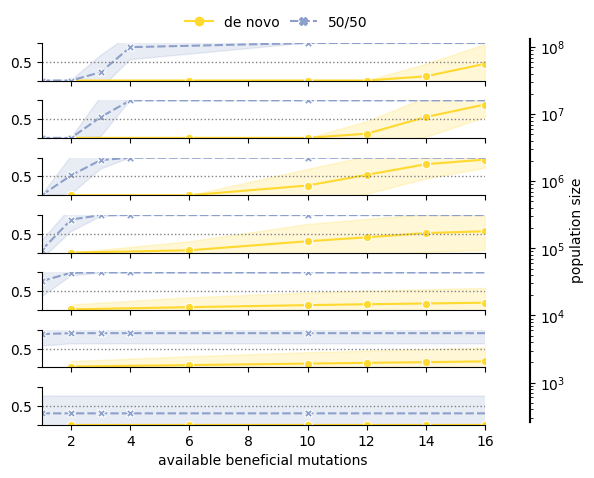

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=sd+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=sd+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.png


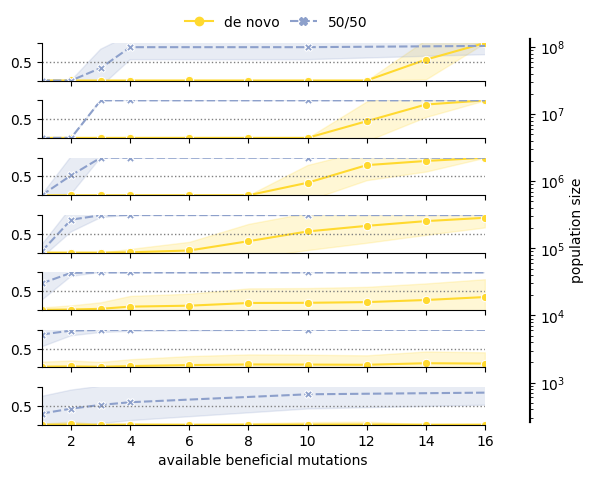

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=se+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=se+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.png


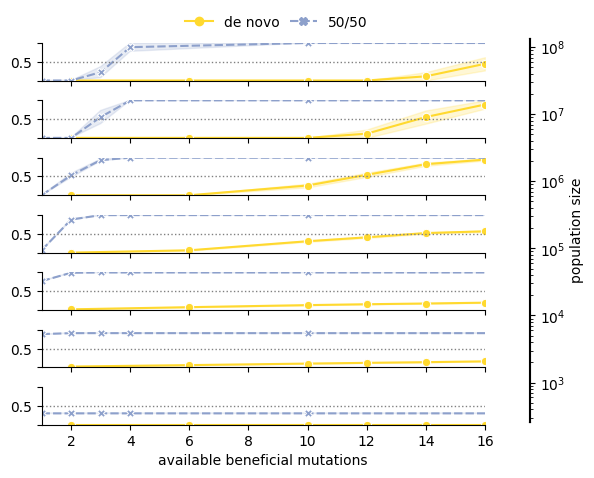

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=se+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=se+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.png


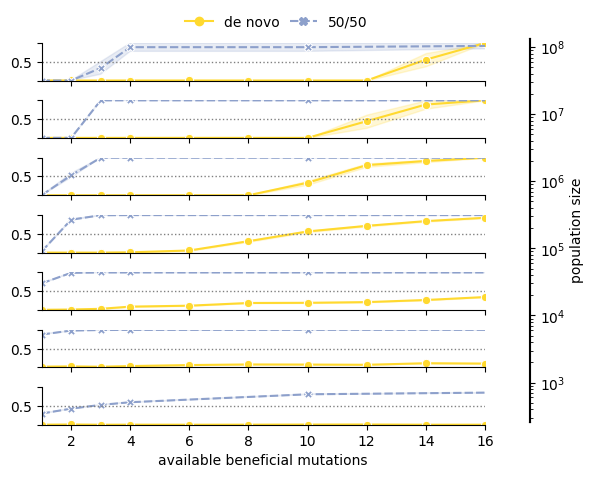

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=ci+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=ci+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.png


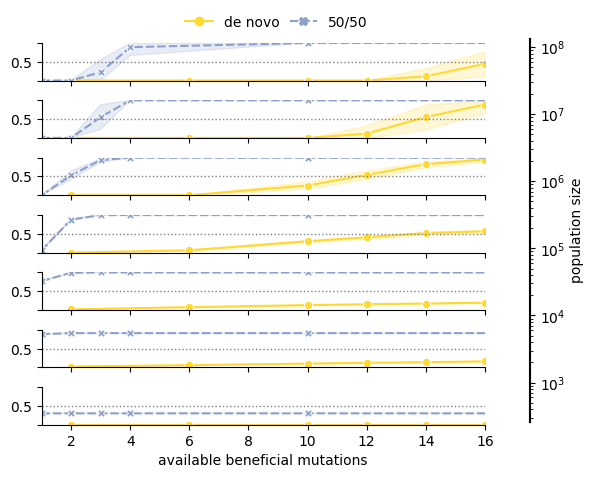

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=ci+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=ci+hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.png


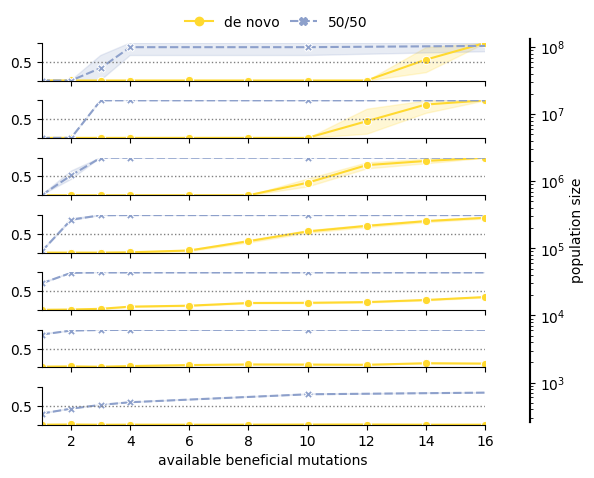

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=counter-based+x=available-beneficial-mutations+y=fix-prob+ext=.png


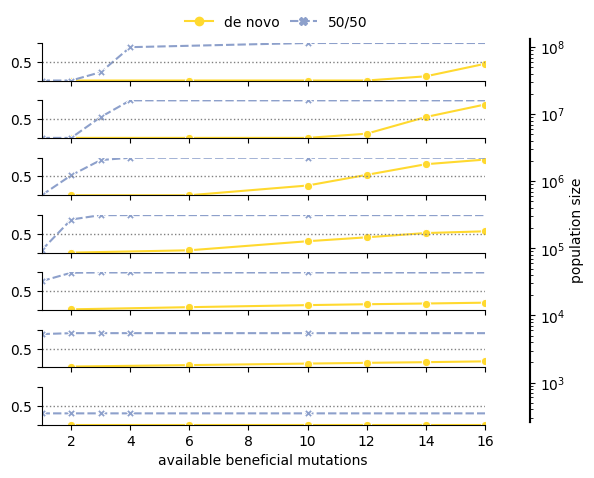

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/hue=initial-conditions+kind=line+palette=set2-r+row=population-size+style=initial-conditions+viz=relplot+what=site-explicit+x=available-beneficial-mutations+y=fix-prob+ext=.png


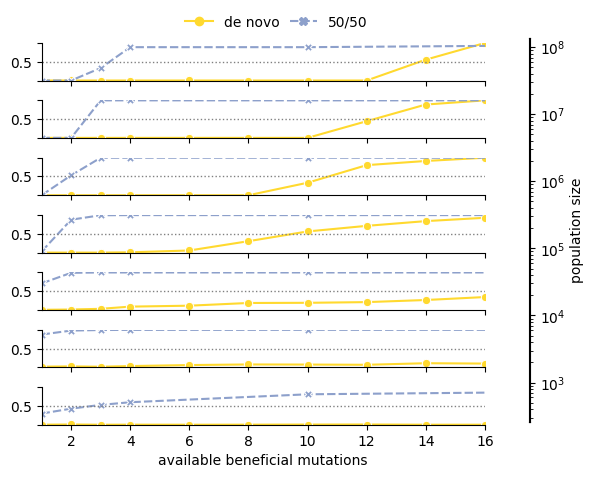

In [10]:
row = "population size"
for errorbar in ["sd", "se", "ci", None]:
    for what, data in dfxs.groupby("genome model"):
        with tp.teed(
            sns.relplot,
            data=data[
                data["genotype"] == "hypermutator"
            ],
            x="available beneficial mutations",
            y="fix\nprob",
            row=row,
            row_order=sorted(
                data[row].unique(), reverse=True
            ),
            hue="initial\nconditions",
            hue_order=["de novo", "50/50"],
            style="initial\nconditions",
            style_order=["de novo", "50/50"],
            aspect=8,
            errorbar=errorbar,
            # facet_kws=dict(margin_titles=True),
            height=0.65,
            kind="line",
            markers=True,
            palette="Set2_r",
            seed=1,
            teeplot_subdir=teeplot_subdir,
            teeplot_outattrs={
                "what": what.replace(" ", "-").replace("/", "-"),
            },
        ) as teed:
            teed.set_titles(
                col_template="",
                row_template="",
            )
            teed.set(
                ylim=(0, 1),
                xlim=(1, 16),
            )
            sns.move_legend(
                teed,
                "lower center",
                bbox_to_anchor=(0.45, 0.97),
                frameon=False,
                ncol=2,
                title=None,
                columnspacing=0.7,
            )
            for ax in teed.axes.flat:
                ax.axhline(0.5, ls=":", c="gray", lw=1)
                ax.set_yticks([0, 0.5, 1])
                ax.set_yticklabels(["", "0.5", ""])
                ax.set_ylabel("")

            teed.tight_layout()

            teed.figure.subplots_adjust(top=0.85)
            delta = 0.001  # Small height for the dummy axis
            pos = teed.axes.flat[0].get_position()
            dummy_ax = ax.figure.add_axes(
                [
                    pos.x0 + pos.width * 1.1,
                    pos.y0 - pos.height * data[row].nunique() * 1.3,
                    delta,
                    pos.height * data[row].nunique() * 1.7,
                ],
            )
            yvals = data[row]
            dummy_ax.set_ylim(yvals.min(), yvals.max())
            dummy_ax.yaxis.set_label_position("right")
            dummy_ax.set_ylabel(row)

            dummy_ax.set_yscale("log")
            dummy_ax.yaxis.set_ticks_position("right")
            dummy_ax.yaxis.set_major_locator(
                mpl_ticker.LogLocator(base=10),
            )
            formatter = mpl_ticker.LogFormatterMathtext(base=10)
            dummy_ax.yaxis.set_major_formatter(formatter)

            # Hide unwanted spines
            dummy_ax.get_xaxis().set_visible(False)

            teed.tight_layout()


## genome model


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=sd+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=sd+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.png


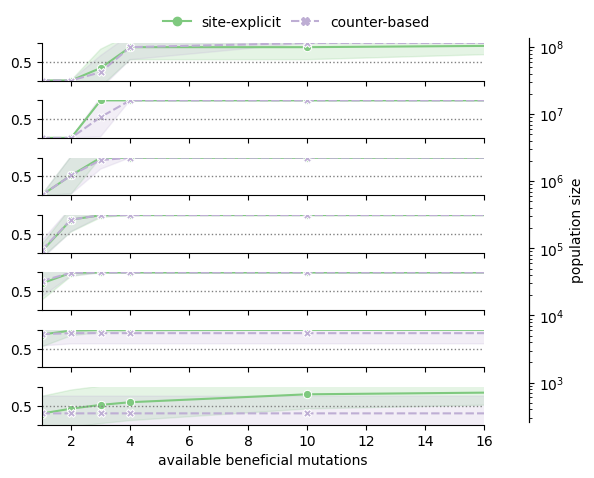

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=sd+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=sd+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.png


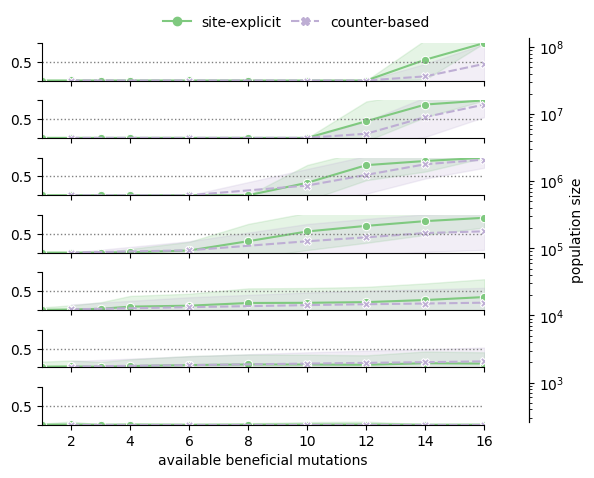

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=se+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=se+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.png


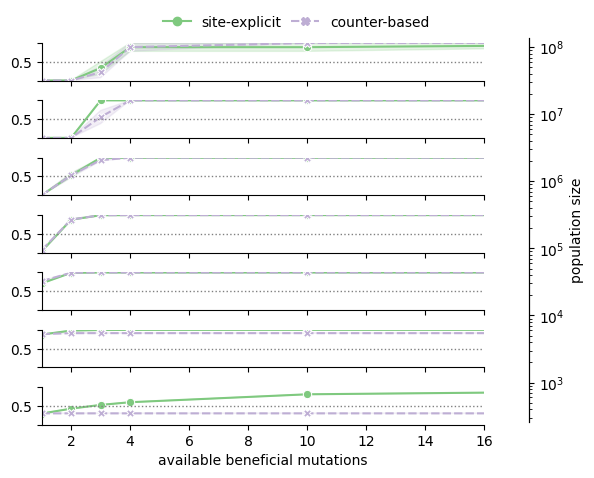

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=se+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=se+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.png


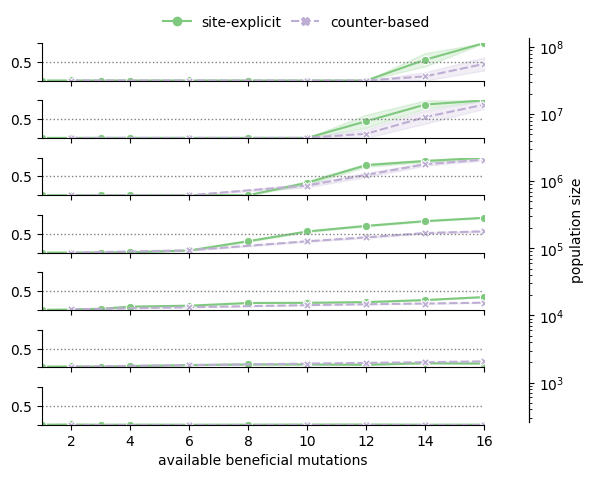

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=ci+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=ci+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.png


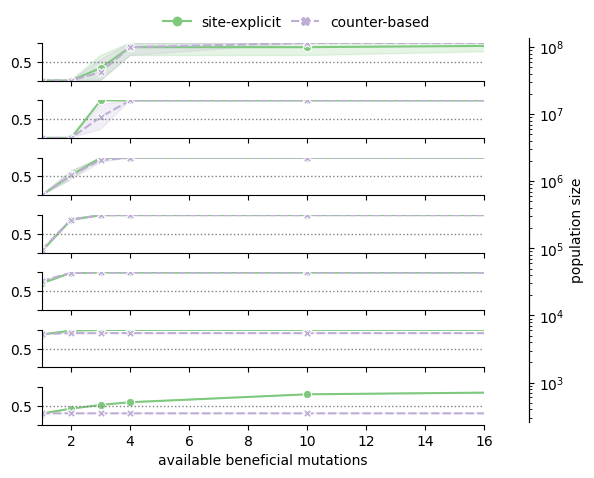

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/errorbar=ci+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/errorbar=ci+hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.png


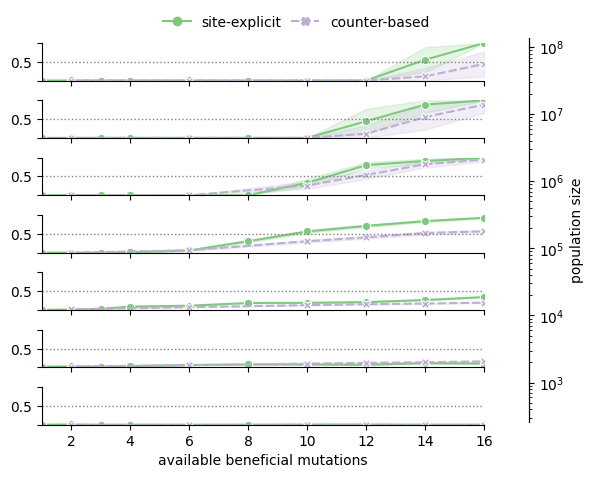

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=50-50+x=available-beneficial-mutations+y=fix-prob+ext=.png


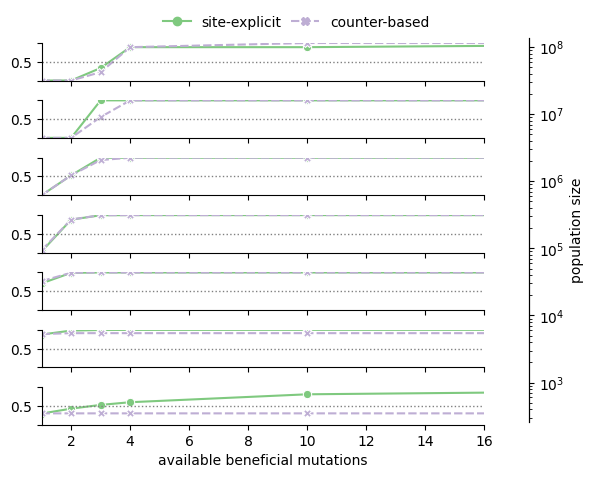

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/wse-traits/hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.pdf
teeplots/wse-traits/hue=genome-model+kind=line+palette=accent+row=population-size+style=genome-model+viz=relplot+what=de-novo+x=available-beneficial-mutations+y=fix-prob+ext=.png


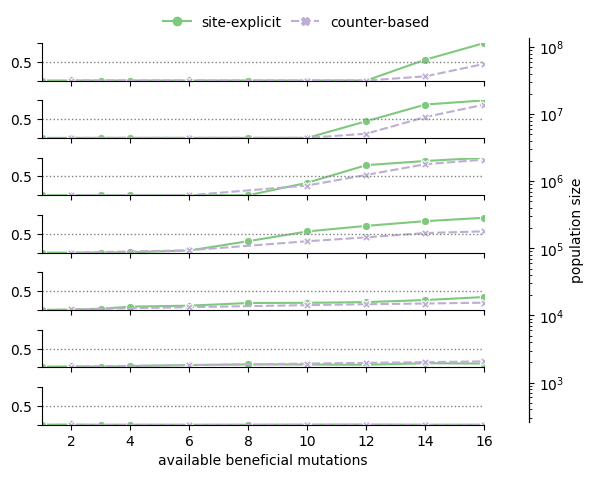

In [11]:
row = "population size"
for errorbar in ["sd", "se", "ci", None]:
    for what, data in dfxs.groupby("initial conditions"):
        with tp.teed(
            sns.relplot,
            data=data[
                data["genotype"] == "hypermutator"
            ],
            x="available beneficial mutations",
            y="fix\nprob",
            row=row,
            row_order=sorted(
                data[row].unique(), reverse=True
            ),
            hue="genome\nmodel",
            hue_order=["site-explicit", "counter-based"],
            style="genome\nmodel",
            style_order=["site-explicit", "counter-based"],
            aspect=8,
            errorbar=errorbar,
            # facet_kws=dict(margin_titles=True),
            height=0.65,
            kind="line",
            markers=True,
            palette="Accent",
            seed=1,
            teeplot_subdir=teeplot_subdir,
            teeplot_outattrs={
                "what": what.replace(" ", "-").replace("/", "-"),
            },
        ) as teed:
            teed.set_titles(
                col_template="",
                row_template="",
            )
            teed.set(
                ylim=(0, 1),
                xlim=(1, 16),
            )
            sns.move_legend(
                teed,
                "lower center",
                bbox_to_anchor=(0.45, 0.97),
                frameon=False,
                title=None,
                ncol=2,
                columnspacing=0.7,
            )
            for ax in teed.axes.flat:
                ax.axhline(0.5, ls=":", c="gray", lw=1)
                ax.set_yticks([0, 0.5, 1])
                ax.set_yticklabels(["", "0.5", ""])
                ax.set_ylabel("")

            teed.tight_layout()

            teed.figure.subplots_adjust(top=0.85)
            delta = 0.001  # Small height for the dummy axis
            pos = teed.axes.flat[0].get_position()
            dummy_ax = ax.figure.add_axes(
                [
                    pos.x0 + pos.width * 1.1,
                    pos.y0 - pos.height * data[row].nunique() * 1.3,
                    delta,
                    pos.height * data[row].nunique() * 1.7,
                ],
            )
            yvals = data[row]
            dummy_ax.set_ylim(yvals.min(), yvals.max())
            dummy_ax.yaxis.set_label_position("right")
            dummy_ax.set_ylabel(row)

            dummy_ax.set_yscale("log")
            dummy_ax.yaxis.set_ticks_position("right")
            dummy_ax.yaxis.set_major_locator(
                mpl_ticker.LogLocator(base=10),
            )
            formatter = mpl_ticker.LogFormatterMathtext(base=10)
            dummy_ax.yaxis.set_major_formatter(formatter)

            # Hide unwanted spines
            dummy_ax.get_xaxis().set_visible(False)

            teed.tight_layout()
